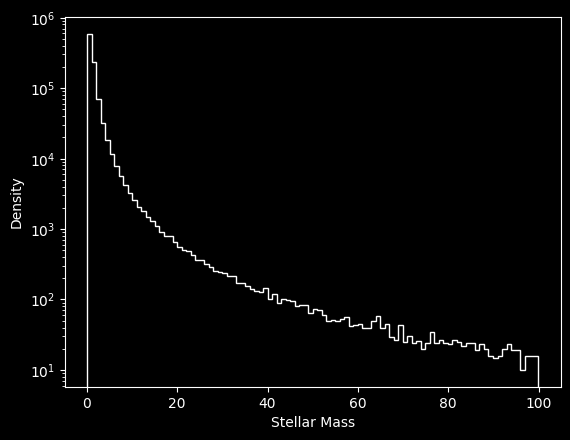

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import ScalarFormatter

plt.style.use('dark_background')

def imf_kroupa(num_stars):
    mass_min = 0.08  # Límite inferior en masas solares
    mass_max = 100.0 # Límite superior en masas solares
    def kroupa_imf(m):
        if m < 0.5:
            return m**-1.3
        else:
            return m**-2.3

    masses = []
    while len(masses) < num_stars:
        mass = np.random.uniform(mass_min, mass_max)
        if np.random.rand() < kroupa_imf(mass):
            masses.append(mass)

    return np.array(masses)

num_stars = 1000000
masses = imf_kroupa(num_stars)

# Visualizar la distribución de masas
plt.hist(masses, bins=100, log=True, color='white', histtype='step')
plt.xlabel(r'Stellar Mass')
plt.ylabel(r'Density')
#plt.title(r'Distribución de masas estelares (IMF de Kroupa)')
plt.savefig('IMF_1e6.png')

plt.show()

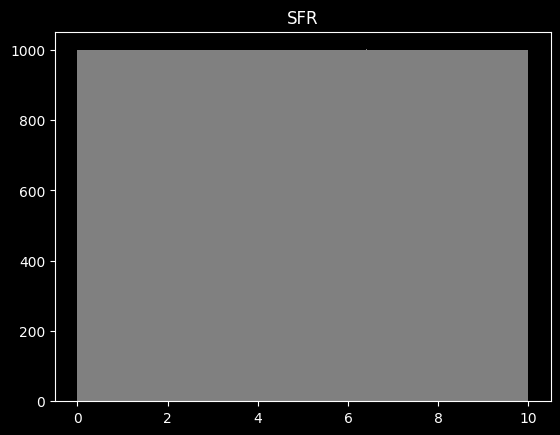

In [95]:
def sfr(n):
    t = np.linspace(0,10,n)
    random.shuffle(t)
    return t
n = num_stars
tb = sfr(n)

time = np.linspace(0,10,1000)
plt.hist(tb,time, color='grey')
plt.title('SFR')
plt.show()

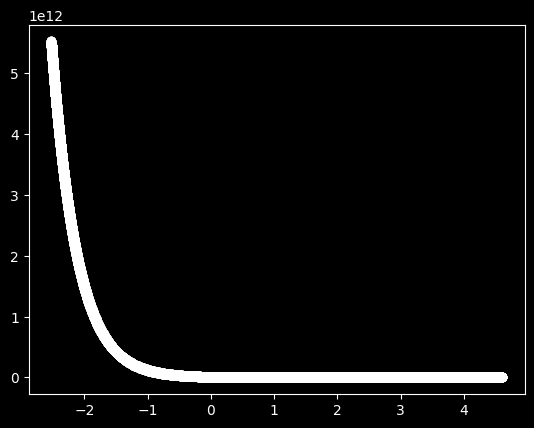

99.90404431798255
5522838607695.711


In [96]:
T = []
for m in masses:
    tms = 10**10/(m**(2.5))
    T.append(tms)
np.shape(T)
plt.scatter(np.log(masses),T, color = 'white')
plt.show()
print(max(masses))
print(max(T))

In [97]:
edades = np.random.uniform(0,10**10,num_stars)
print(np.sum(edades>T))

T = np.array(T)
remanentes_age = edades[edades > T]
print(len(remanentes_age))
#print(remanentes_age)

299305
299305


In [98]:
remanentes_mass = masses[edades > T]
#print(remanentes_mass)
print(len(remanentes_mass))
#for i in remanentes_mass:
#    if i > 80:
#        print(i)
#        break

299305


In [99]:
masses_wd = []
edades_wd = []
rest_remanent = []
for j, i in enumerate(remanentes_mass):
    if i < 9:
        edades_wd.append(remanentes_age[j])
        wd_mass = 0.190*i + 0.394
        masses_wd.append(wd_mass)
    else:
        rest_remanent.append(i)
print(len(masses_wd))
print(len(edades_wd))
print(len(rest_remanent))
#n = 0 
#for i in masses_wd:
#    if i < 6.5: ### 6.5 limite maximo para wd segun ferrario 2005
#        n+=1
#    else:
#        n=n
#print(n)

274322
274322
24983


In [100]:
masses_ns = []
edades_ns = []
rest_remanent1 = []
for j, i in enumerate(rest_remanent):
    if i <= 13 and i >= 9:
        edades_ns.append(remanentes_age[j])
        ns_mass = 2.24 + 0.508*(i-14.75) + 0.125*(i - 14.75)**2 + 0.0110*(i - 14.75)**3
        masses_ns.append(ns_mass)
    elif i < 15 and i > 13:
        edades_ns.append(remanentes_age[j])
        ns_mass = 0.123 + 0.112*i
        masses_ns.append(ns_mass)
    elif i < 17.8 and i>=15:
        edades_ns.append(remanentes_age[j])
        ns_mass = 0.996 + 0.0384*i
        masses_ns.append(ns_mass)
    elif i < 18.5 and i > 17.8:
        edades_ns.append(remanentes_age[j])
        ns_mass = -0.020 + 0.10*i
        masses_ns.append(ns_mass)
    else:
        rest_remanent1.append(i)
print(masses_ns[:10])
print(len(masses_ns))
print(len(rest_remanent1))
print(len(edades_ns))

[1.5058512157815132, 1.4575590111861492, 1.670764902975318, 1.6717725035112376, 1.7231756678748673, 1.4315240670372147, 1.511258001534273, 1.4723829345472712, 1.7023749579435028, 1.4951726020871383]
15876
9107
15876


In [101]:
masses_bh = []
edades_bh = []
rest_remanent2 = []
for j, i in enumerate(rest_remanent1):
    if i >= 15 and i <= 40:

        edades_bh.append(remanentes_age[j])
        
        bh_core = -2.049 + 0.4140*i 
        bh_all = 15.52 - 0.3294*(i-25.97) - 0.02121*(i-25.97)**2 + 0.003120*(i-25.97)**3
        bh = 0.9*bh_core + (1-0.9)*bh_all
        masses_bh.append(bh)
    elif i >= 45 and i <= 120:

        edades_bh.append(remanentes_age[j])
        
        bh = 5.697 + 7.8598*(10**8)*i**(-4.858)
        masses_bh.append(bh)
    else:
        rest_remanent2.append(i)
print(len(masses_bh))
print(len(rest_remanent2)) # Observamos que hay 6 remanentes entre el gap de las condiciones de BH
print(len(edades_bh))

8601
506
8601


In [102]:
frac_wd = len(masses_wd)/len(remanentes_mass)
frac_ns = len(masses_ns)/len(remanentes_mass)
frac_bh = len(masses_bh)/len(remanentes_mass)
frac_res = len(rest_remanent2)/len(remanentes_mass)
frac_total = frac_wd + frac_ns + frac_bh + frac_res
print(frac_wd)
print(frac_ns)
print(frac_bh)
print(frac_total)

0.9165299610764939
0.053042882678204506
0.028736573060924475
1.0


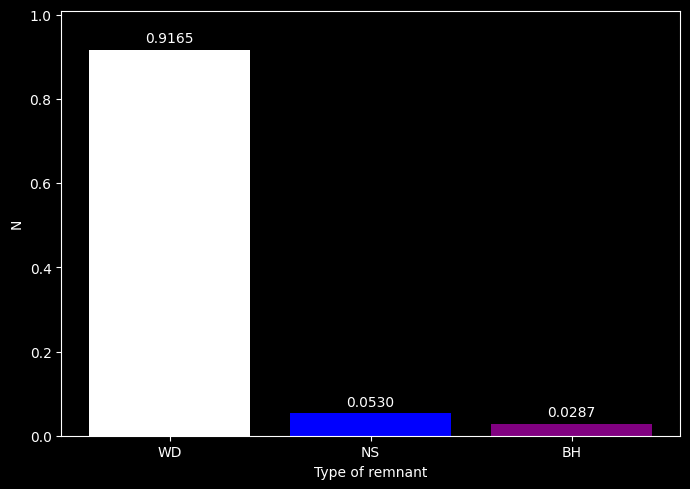

In [103]:
## Gráfico ##
remnant_types = ['WD', 'NS', 'BH']
fractions = [frac_wd, frac_ns, frac_bh]

plt.figure(figsize=(7, 5))
plt.bar(remnant_types, fractions, color=['white', 'blue', 'purple'])

plt.xlabel('Type of remnant')
plt.ylabel('N')
plt.ylim(0, max(fractions) * 1.1)

for i, v in enumerate(fractions):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('remnant_percentage_1e6.png')

plt.show()


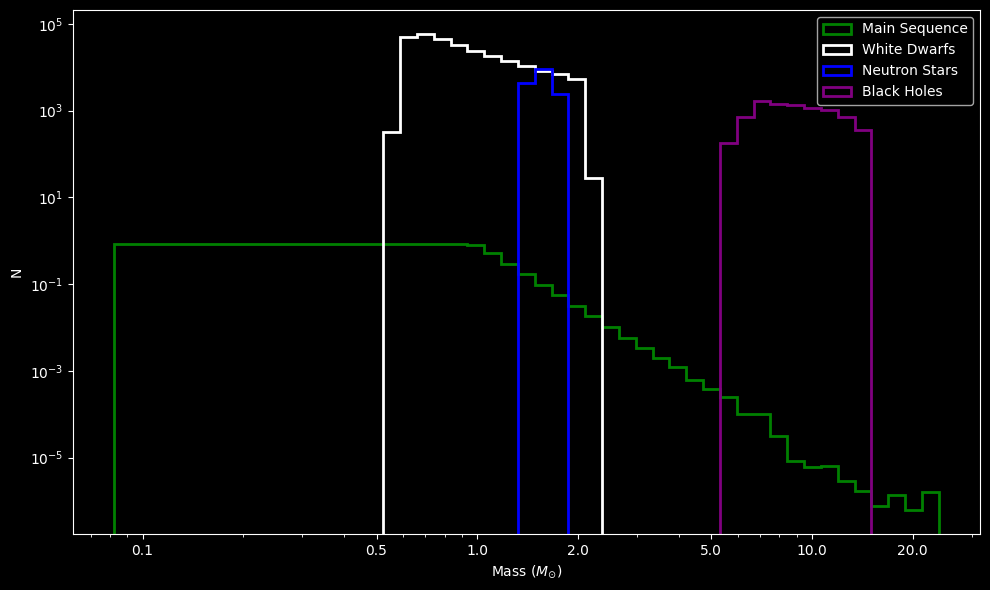

In [104]:
masses_ms = masses[edades <= T]
all_masses = np.concatenate([masses_wd, masses_ns, masses_bh, masses_ms])

if len(all_masses) > 0:
    min_all = np.min(all_masses)
    max_all = np.max(all_masses)
    # 50 bins en escala logarítmica
    bins = np.logspace(np.log10(min_all) * 0.99, np.log10(max_all) * 1.01, 50)
else:
    bins = 50 

plt.figure(figsize=(10, 6))
plt.hist(masses_ms, bins=bins, label='Main Sequence', histtype='step', color='green', linewidth=2, density=True)
plt.hist(masses_wd, bins=bins, label='White Dwarfs', histtype='step', color='white', linewidth=2)
plt.hist(masses_ns, bins=bins, label='Neutron Stars', histtype='step', color='blue', linewidth=2)
plt.hist(masses_bh, bins=bins, label='Black Holes', histtype='step', color='purple', linewidth=2)
plt.xscale('log') 
plt.yscale('log') 

major_ticks = [0.1, 0.5, 1, 2, 5, 10, 20, 50, 100] 
plt.gca().xaxis.set_major_locator(FixedLocator(major_ticks))
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Mass ($M_{\\odot}$)') 
plt.ylabel('N')
plt.legend()
plt.tight_layout()
plt.savefig('remnant_number_mass_1e6.png')
plt.show()

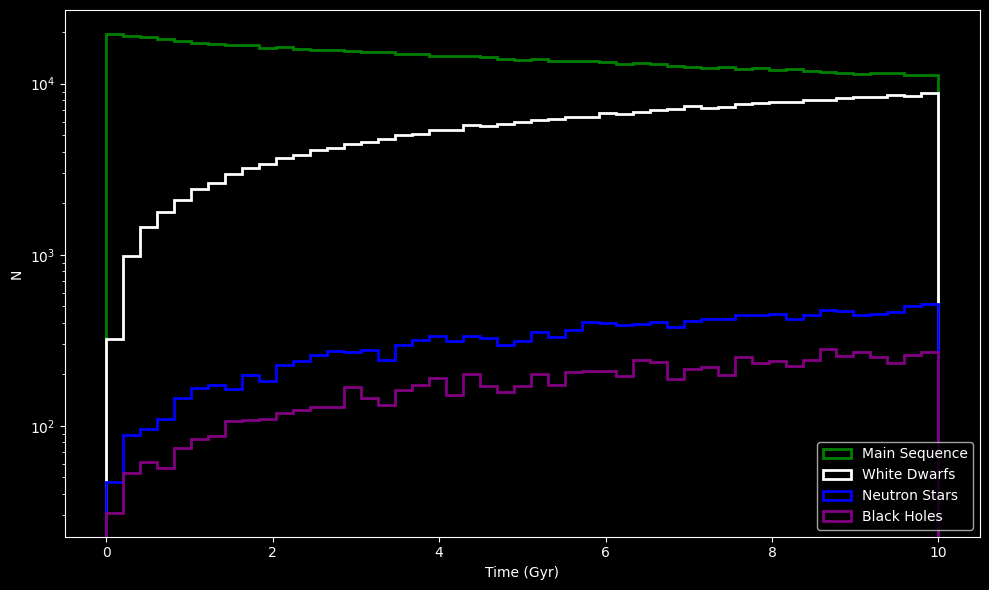

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FixedLocator, ScalarFormatter
edades_ms = edades[edades <= T]
#hay que convertir a Gyr !!
ages_wd_gyr = np.array(edades_wd) / 1e9
ages_ns_gyr = np.array(edades_ns) / 1e9
ages_bh_gyr = np.array(edades_bh) / 1e9
ages_ms_gyr = np.array(edades_ms) / 1e9  

all_ages = np.concatenate([ages_wd_gyr, ages_ns_gyr, ages_bh_gyr, ages_ms_gyr])

if len(all_ages) > 0:
    max_age = np.max(all_ages)
    bins = np.linspace(0, 10, 50)
else:
    bins = 50 

plt.figure(figsize=(10, 6))
plt.hist(ages_ms_gyr, bins=bins, label='Main Sequence', histtype='step', color='green', linewidth=2)
plt.hist(ages_wd_gyr, bins=bins, label='White Dwarfs', histtype='step', color='white', linewidth=2)
plt.hist(ages_ns_gyr, bins=bins, label='Neutron Stars', histtype='step', color='blue', linewidth=2)
plt.hist(ages_bh_gyr, bins=bins, label='Black Holes', histtype='step', color='purple', linewidth=2)
plt.xscale('linear') 
plt.yscale('log') 
plt.xlabel('Time (Gyr)') 
plt.ylabel('N')
plt.legend(loc='lower right') 
plt.tight_layout()
plt.savefig('remnant_number_age_1e6.png')
plt.show()

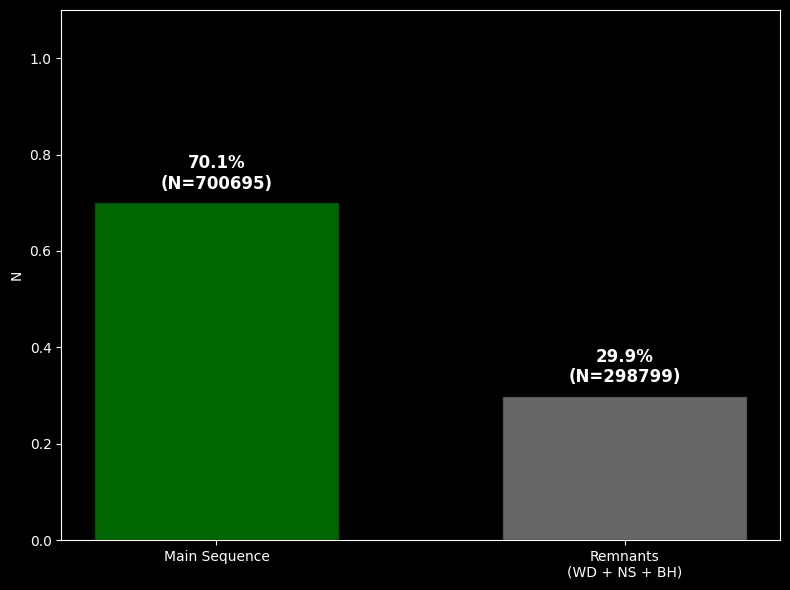

In [106]:
import matplotlib.pyplot as plt

count_ms = len(masses_ms)
count_remnants = len(masses_wd) + len(masses_ns) + len(masses_bh)

counts = [count_ms, count_remnants]
total_stars = sum(counts)
fractions = [c / total_stars for c in counts]

categories = ['Main Sequence', 'Remnants\n(WD + NS + BH)']
colors = ['green', 'gray'] 

plt.figure(figsize=(8, 6))

bars = plt.bar(categories, fractions, color=colors, edgecolor='black', alpha=0.8, width=0.6)

plt.ylabel('N')
plt.ylim(0, 1.1)
for i, v in enumerate(fractions):
    label_text = f"{v:.1%}\n(N={counts[i]})"
    plt.text(i, v + 0.02, label_text, ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('ms_remnant_frac_1e6.png')
plt.show()

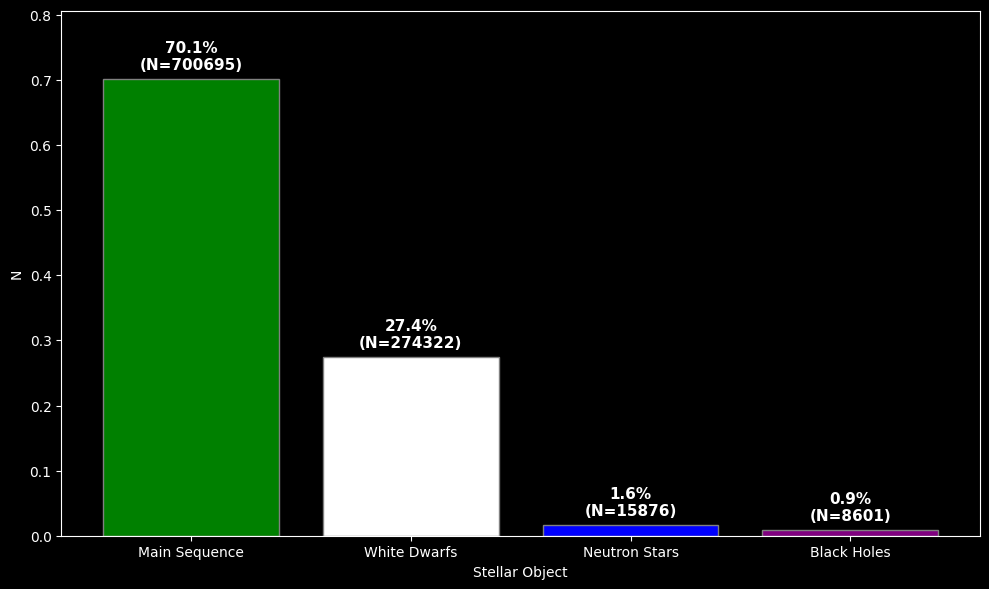

In [107]:
import matplotlib.pyplot as plt
import numpy as np

counts = [len(masses_ms), len(masses_wd), len(masses_ns), len(masses_bh)]
total_stars = sum(counts)

fractions = [c / total_stars for c in counts]

star_types = ['Main Sequence', 'White Dwarfs', 'Neutron Stars', 'Black Holes']
colors = ['green', 'white', 'blue', 'purple']

plt.figure(figsize=(10, 6))
bars = plt.bar(star_types, fractions, color=colors, edgecolor='gray', linewidth=1)
plt.xlabel('Stellar Object')
plt.ylabel('N')
plt.ylim(0, max(fractions) * 1.15) 
for i, v in enumerate(fractions):
    label_text = f"{v:.1%}\n(N={counts[i]})"
    plt.text(i, v + 0.01, label_text, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('remnant_fractions_1e6.png')
plt.show()